<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/03_validacio%CC%81n_cruzada_anidada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC, SVR
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import SCORERS
from sklearn import datasets

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(353, 10)

## Procedimiento de validación cruzada anidada (nested cross-validation)

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np


print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
#iris = load_iris()
#X_iris = iris.data
#y_iris = iris.target

# caso dataset diabetes
X_iris = X_train
y_iris = y_train

# Set up possible values of parameters to optimize over
grid_list = {"svr__C": [0.1, 10, 100, 1000],
             "svr__gamma": [0.01, 0.1, 1, 10]}

# We will use a Support Vector Classifier with "rbf" kernel
model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('svr', SVR(C= 1, kernel = 'rbf', gamma = 1))])

# Arrays to store scores
non_nested_scores = []
nested_scores = []

metric = 'neg_root_mean_squared_error'
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=3, shuffle=True) #model selection
    outer_cv = KFold(n_splits=3, shuffle=True) #model validation

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model_pipeline, param_grid=grid_list, cv=inner_cv, scoring = metric)
    clf.fit(X_iris, y_iris)
    #non_nested_scores[i] = clf.best_score_
    non_nested_scores.append(clf.best_score_)

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv, scoring = metric)
    nested_scores.append(nested_score)

Automatically created module for IPython interactive environment


In [ ]:
non_nested_scores

[-53.376356736478236,
 -55.68772381176896,
 -54.350291041350864,
 -54.46836345034219,
 -56.227708508448565,
 -53.456647208371976,
 -55.64596855676891,
 -55.212935220692295,
 -53.513986324749645,
 -54.798943277760976,
 -54.5078124117212,
 -55.0097433958153,
 -55.34425301668881,
 -53.922059591117126,
 -53.16628019674828,
 -53.97477491188099,
 -54.345554162333464,
 -56.24818571976038,
 -54.643336551304536,
 -53.70265457718065,
 -54.9224958979091,
 -56.11781768560899,
 -55.53871644264739,
 -54.45587495616081,
 -53.809689981699705,
 -52.40926433630523,
 -53.30604328542688,
 -53.618856750983326,
 -53.59473308099931,
 -54.57167536808284]

<Axes: >

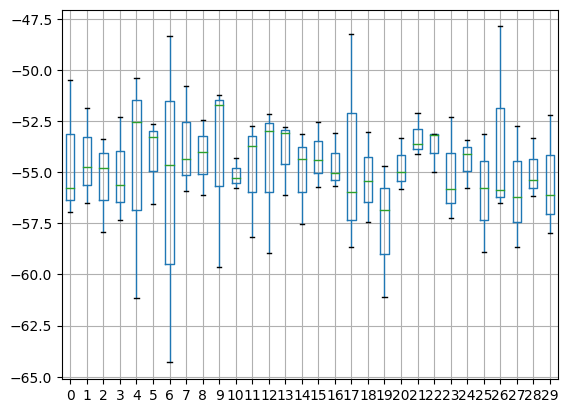

In [ ]:
import pandas as pd
pd.DataFrame(nested_scores).transpose().boxplot()

Average difference of 0.478635 with std. dev. of 1.188580.


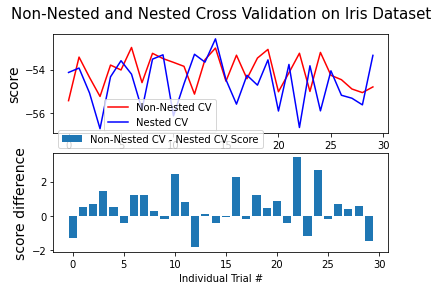

In [ ]:
import numpy as np

nested_scores = np.array([np.mean(e) for e in nested_scores])
score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()